# Face Expression Recognition using Teachable Machine Model

In [ ]:
# If running in Colab, install dependencies (if needed)
#!pip install tensorflow opencv-python matplotlib


tensorflow for deep learning operations.

numpy for numerical operations.

cv2 (OpenCV) for working with images and webcam input.

matplotlib.pyplot for image plotting.

In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import DepthwiseConv2D

class CustomDepthwiseConv2D(DepthwiseConv2D):
    @classmethod
    def from_config(cls, config):
        config.pop('groups', None)  # Remove the unsupported key
        return super().from_config(config)

model = load_model('/content/keras_model.h5', custom_objects={
    'DepthwiseConv2D': CustomDepthwiseConv2D
})


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model file: The model is loaded from keras_model.h5, which is the format exported by Teachable Machine.

Custom Layer Handling: Teachable Machine may use DepthwiseConv2D layers with a groups parameter not supported in older TensorFlow versions. This workaround removes the groups parameter when loading

 Model Type:
Although it's not explicitly named in this cell, Teachable Machine image models are typically based on MobileNet or MobileNetV2, which are lightweight convolutional neural networks

This file, keras_model.h5, is the exported model from Teachable Machine, and it:



Might include layers like DepthwiseConv2D, which is a MobileNet hallmark.

Is pre-trained on ImageNet, and retrained (transfer learning) on your custom classes like "Happy", "Sad", etc.

**The .h5 file extension typically refers to HDF5 (Hierarchical Data Format version 5)** files. It's a popular file format for storing and organizing large amounts of numerical data, and it's used across many fields including scientific computing, machine learning, and data engineering.

**Key Features of .h5 (HDF5) Files:**
Hierarchical structure: Like a file system, it can store data in groups and datasets.

Efficient: Handles large datasets that might not fit into memory.

Portable: Platform-independent and self-describing.

Flexible: Can store arrays, images, tables, and even metadata.

**What Does an .h5 Model File Contain?**
When you save a Keras model as .h5, it can include:

Content	Description
Model Architecture	The structure of the neural network (layers, activations, shapes, etc.)
Weights	The trained parameters of the model
Optimizer State	(Optional) Info to resume training (like learning rate, momentum)
Training Config	Loss function, metrics, optimizer, etc.
Custom Objects	Custom layers/functions (if provided at load time)

**Traditional Convolution:**
Applies a set of filters over the entire input depth (e.g., all RGB channels) and computes new features.

Very computationally expensive.


**Depthwise Separable Convolution (the heart of MobileNet):**
It splits standard convolution into two lightweight steps:

Depthwise Convolution:

Applies a single filter per input channel (e.g., one for R, one for G, one for B).

Captures spatial information independently per channel.

Pointwise Convolution (1x1):

Applies a 1x1 convolution across all channels to combine them.

Learns inter-channel dependencies.

✅ This reduces the computation by up to 8-9 times, without a huge drop in accuracy.

In [ ]:
model.summary

<bound method Model.summary of <Sequential name=sequential_4, built=True>>

MobileNet is a family of convolutional neural networks (CNNs) designed by Google for efficient vision tasks like:

Image classification

Object detection

Face recognition

Pose estimation

It’s optimized for speed and low memory usage, making it ideal for mobile and embedded systems

**Traditional Convolution:**
Applies a set of filters over the entire input depth (e.g., all RGB channels) and computes new features.

Very computationally expensive.


**Depthwise Separable Convolution (the heart of MobileNet):**
It splits standard convolution into two lightweight steps:

Depthwise Convolution:

Applies a single filter per input channel (e.g., one for R, one for G, one for B).

Captures spatial information independently per channel.

Pointwise Convolution (1x1):

Applies a 1x1 convolution across all channels to combine them.

Learns inter-channel dependencies.

✅ This reduces the computation by up to 8-9 times, without a huge drop in accuracy.

In [ ]:
import tensorflow.compat.v1 as tf

In [ ]:
# Define class names in the same order as Teachable Machine training
class_names = ["Happy", "Sad", "Angry", "Surprised","Fear","Disgust"]  # Update these as per your model


In [ ]:
def predict_expression(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (224, 224))  # or 240x240 depending on your model
    img_array = np.expand_dims(img_resized / 255.0, axis=0)

    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions)

    # Check if predicted_index is within the valid range
    if predicted_index < len(class_names):
        predicted_class = class_names[predicted_index]
        confidence = predictions[0][predicted_index]

        # Show image with predicted label
        plt.imshow(img_rgb)
        plt.title(f"Prediction: {predicted_class} ({confidence * 100:.2f}%)")
        plt.axis('off')
        plt.show()

        return predicted_class, confidence
    else:
        print(f"Error: Predicted index {predicted_index} is out of range for class_names.")
        return None, None  # or handle the error as you prefer

Reads the image using OpenCV.

Converts BGR (OpenCV's default) to RGB.

Resizes the image to 224×224 (default input size for MobileNet).

Normalizes the pixel values to the range [0, 1].

Predicts with the model.

Gets the class with the highest confidence.

Displays the image with the predicted label and confidence.

Returns the predicted label and confidence score.

In [ ]:
def predict_expression(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (224, 224))  # or 240x240 depending on your model
    img_array = np.expand_dims(img_resized / 255.0, axis=0)

    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions)
    predicted_class = class_names[predicted_index]
    confidence = predictions[0][predicted_index]

    # Show image with predicted label
    plt.imshow(img_rgb)
    plt.title(f"Prediction: {predicted_class} ({confidence * 100:.2f}%)")
    plt.axis('off')
    plt.show()

    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


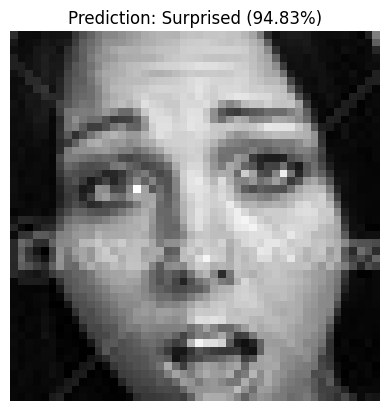

('Surprised', np.float32(0.9483367))

In [ ]:
# Example usage
test_image_path = "/content/12551.jpg"  # Update this path to your image
predict_expression(test_image_path)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


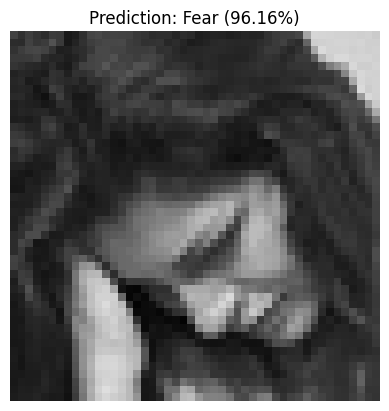

('Fear', np.float32(0.961569))

In [ ]:
test_image_path = "/content/3823.jpg"  # Update this path to your image
predict_expression(test_image_path)